### Assignment No. :- 8

##### Title :- By using multinomial Naive Bayes, RandomForest, Logistic Regression classifiers, perform news classification and analysis to categorize news articles into predefined categories and extract actionable insights. Use AG_news dataset. 

##### Name :- Tamboli Majid Samir
##### Class :- T.Y.A.I :- B
##### Batch :- B
##### Roll No. :- 2317126

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/majid/Downloads/train.csv")

In [3]:
df

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [5]:
df.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

In [6]:
df['Class Index'].value_counts()

Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tfidf = TfidfVectorizer(stop_words ='english')
x = tfidf.fit_transform(df['Description'])
y = df['Class Index']

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size = 0.8 , random_state = 42)

### 1. Multinomial Naive Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB

In [11]:
modelMNB = MultinomialNB()

In [12]:
modelMNB

MultinomialNB()

In [13]:
modelMNB.fit(x_train,y_train)

MultinomialNB()

In [14]:
y_pred_MNB = modelMNB.predict(x_test)

In [15]:
y_pred_MNB

array([3, 3, 2, ..., 2, 1, 2], shape=(24000,))

In [16]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , ConfusionMatrixDisplay
AccMNB = accuracy_score(y_test , y_pred_MNB)
cm = confusion_matrix(y_test , y_pred_MNB)
cr = classification_report(y_test , y_pred_MNB)

In [17]:
print("Accuracy Score of Multinomial Naive Bayes is :\n",AccMNB)

Accuracy Score of Multinomial Naive Bayes is :
 0.8959583333333333


In [18]:
print(cr)

              precision    recall  f1-score   support

           1       0.91      0.89      0.90      5956
           2       0.94      0.97      0.96      6058
           3       0.85      0.86      0.86      5911
           4       0.88      0.86      0.87      6075

    accuracy                           0.90     24000
   macro avg       0.90      0.90      0.90     24000
weighted avg       0.90      0.90      0.90     24000



In [19]:
cm

array([[5295,  238,  292,  131],
       [  72, 5900,   40,   46],
       [ 213,   67, 5112,  519],
       [ 269,   68,  542, 5196]])

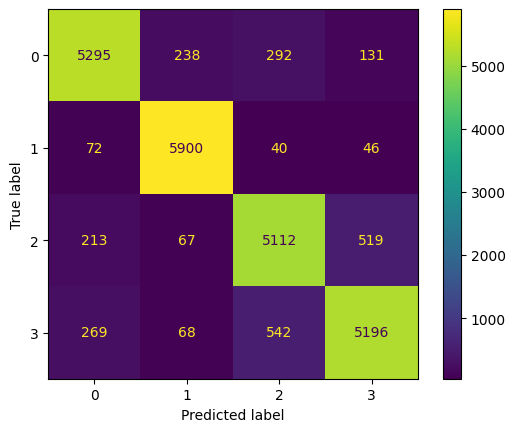

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### 2. Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model_RF = RandomForestClassifier(n_estimators = 50 , max_depth = 10)

In [25]:
model_RF

RandomForestClassifier(max_depth=10, n_estimators=50)

In [26]:
model_RF.fit(x_train , y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [27]:
y_pred_RF = model_RF.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , ConfusionMatrixDisplay
AccRF = accuracy_score(y_test , y_pred_RF)
cm = confusion_matrix(y_test , y_pred_RF)
cr = classification_report(y_test , y_pred_RF)

In [29]:
print("Accuracy Score of Random Forest Classifier is :\n",AccRF)

Accuracy Score of Random Forest Classifier is :
 0.7764166666666666


In [30]:
print(cr)

              precision    recall  f1-score   support

           1       0.82      0.78      0.80      5956
           2       0.73      0.93      0.82      6058
           3       0.81      0.67      0.73      5911
           4       0.78      0.73      0.75      6075

    accuracy                           0.78     24000
   macro avg       0.78      0.78      0.77     24000
weighted avg       0.78      0.78      0.77     24000



In [31]:
cm

array([[4633,  770,  325,  228],
       [ 192, 5642,  109,  115],
       [ 467,  557, 3952,  935],
       [ 356,  806,  506, 4407]])

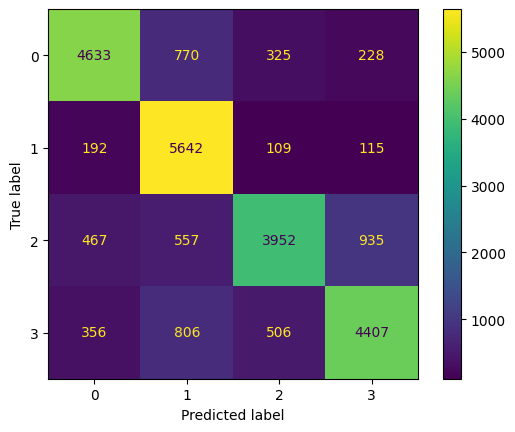

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### 3.Logistics Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
modelLR = LogisticRegression()

In [35]:
modelLR

LogisticRegression()

In [37]:
modelLR.fit(x_train , y_train)

LogisticRegression()

In [39]:
y_pred_LR = modelLR.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , ConfusionMatrixDisplay
AccLR = accuracy_score(y_test , y_pred_LR)
cm = confusion_matrix(y_test , y_pred_LR)
cr = classification_report(y_test , y_pred_LR)

In [41]:
print("Accuracy Score of Logistics Regression is :\n",AccLR)

Accuracy Score of Logistics Regression is :
 0.90725


In [42]:
print(cr)

              precision    recall  f1-score   support

           1       0.92      0.90      0.91      5956
           2       0.95      0.98      0.96      6058
           3       0.88      0.87      0.88      5911
           4       0.88      0.88      0.88      6075

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



In [43]:
cm

array([[5333,  209,  254,  160],
       [  64, 5913,   34,   47],
       [ 203,   57, 5155,  496],
       [ 210,   67,  425, 5373]])

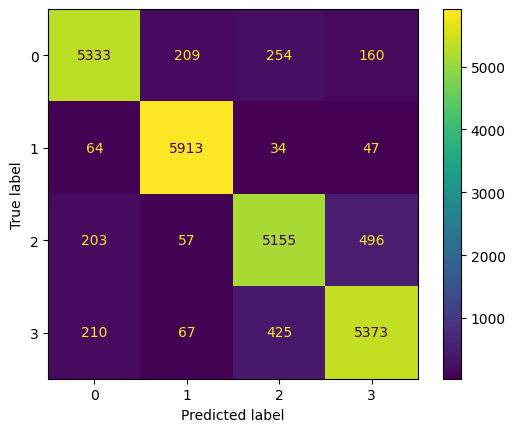

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### Comparison Of Accuracies Of Diffrent Models

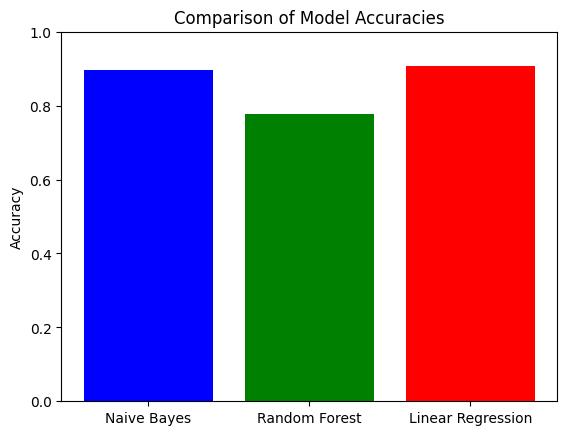

In [46]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'Random Forest', 'Linear Regression']
accuracies = [AccMNB, AccRF, AccLR]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

plt.show()
